<a href="https://colab.research.google.com/github/lakshyadivya123123/AI-ML/blob/main/Bollinger%20Band%20Strategy(Backtesting).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
def bollinger_bands_strategy(data, window=20, num_std=2):
    signals = pd.DataFrame(index=data.index)
    signals['signal'] = 0.0

    # Calculate Bollinger Bands
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()

    signals['upper_band'] = rolling_mean + (num_std * rolling_std)
    signals['lower_band'] = rolling_mean - (num_std * rolling_std)

    # Generate signals based on Doji candlestick pattern
    signals['doji'] = np.where(
        np.abs(data['Close'] - data['Open']) <= 0.001 * data['Close'],
        1.0, 0.0
    )

    signals['positions'] = signals['doji'].diff()
    signals['signal'][signals['positions'] == 1] = 1.0
    signals['signal'][signals['positions'] == -1] = -1.0

    return signals

In [ ]:
def backtest_strategy(data, signals):
    positions = pd.DataFrame(index=signals.index).fillna(0.0)
    positions['Position'] = 1000 * signals['signal']  # Trading 1000 shares per signal

    portfolio = positions.multiply(data['Adj Close'], axis=0)
    pos_diff = positions.diff()

    portfolio['Holdings'] = (positions.multiply(data['Adj Close'], axis=0)).sum(axis=1)
    portfolio['Cash'] = 100000 - (pos_diff.multiply(data['Adj Close'], axis=0)).sum(axis=1).cumsum()
    portfolio['Total'] = portfolio['Cash'] + portfolio['Holdings']
    portfolio['Returns'] = portfolio['Total'].pct_change()

    return portfolio


[*********************100%***********************]  1 of 1 completed
            signal  upper_band  lower_band  doji  positions
Date                                                       
2022-12-23     0.0   20.756076   17.121924   0.0        0.0
2022-12-27     0.0   20.688822   17.029178   0.0        0.0
2022-12-28     0.0   20.597341   16.945658   0.0        0.0
2022-12-29     0.0   20.345805   16.986195   0.0        0.0
2022-12-30     0.0   20.000688   17.081311   0.0        0.0


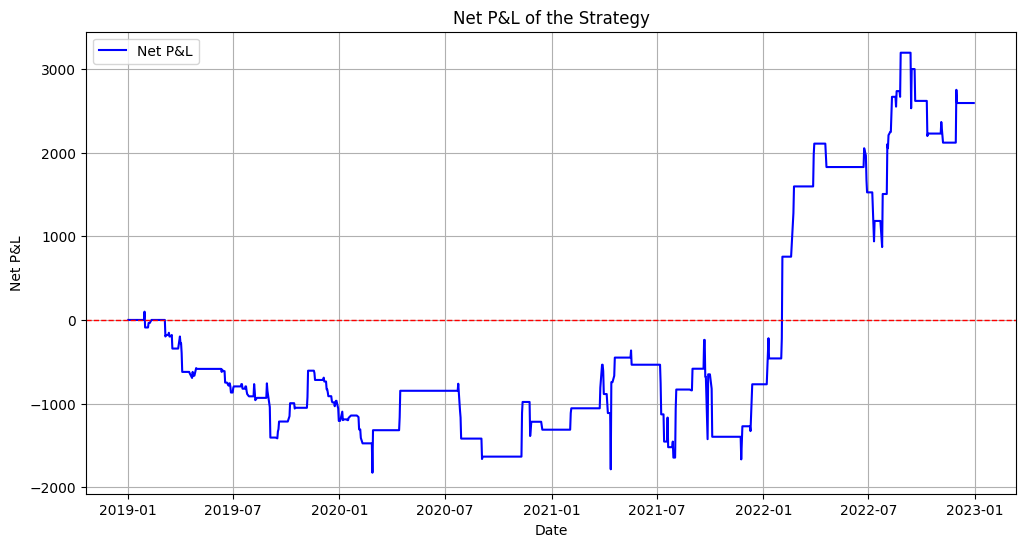

Risk-Reward Ratio: 1.3468858182913466
Expected Value (EV): 0.36861229491430353
successful trades: 230
total trades: 1008
Probability of the strategy working: 0.22817460317460317


In [ ]:
#Lets take INFOSYS from technology sector
if __name__ == '__main__':
    ticker = 'INFY'
    start_date = '2019-01-01'
    end_date = '2022-12-31'
    data = yf.download(ticker, start=start_date, end=end_date)

    signals = bollinger_bands_strategy(data)
    portfolio = backtest_strategy(data, signals)
    # Print buy/sell signals
    print(signals.tail())

    # Calculate net P&L
    portfolio['Net P&L'] = portfolio['Total'] - portfolio['Total'][0]

    # Calculate risk-reward ratio
    total_return = portfolio['Net P&L'][-1]
    max_drawdown = (portfolio['Total'].cummax() - portfolio['Total']).max()
    risk_reward_ratio = total_return / max_drawdown

    # Calculate probability of the strategy working
    successful_trades = sum(portfolio['Net P&L'] > 0)
    total_trades = len(portfolio)
    probability = successful_trades / total_trades

    # Plot the net P&L graph
    plt.figure(figsize=(12, 6))
    plt.plot(portfolio.index, portfolio['Net P&L'], label='Net P&L', color='b')
    plt.axhline(0, color='r', linestyle='--', lw=1)  # Add a horizontal line at zero for reference
    plt.legend(loc='best')
    plt.xlabel('Date')
    plt.ylabel('Net P&L')
    plt.title('Net P&L of the Strategy')
    plt.grid(True)
    plt.show()

     # Print risk-reward ratio, expected value, and probability
    print("Risk-Reward Ratio:", risk_reward_ratio)
    print("Expected Value (EV):", portfolio['Returns'].mean() / portfolio['Returns'].std() * np.sqrt(252))
    print("successful trades:",successful_trades)
    print("total trades:",total_trades)
    print("Probability of the strategy working:", probability)

[*********************100%***********************]  1 of 1 completed
            signal   upper_band   lower_band  doji  positions
Date                                                         
2022-12-26     0.0  9064.109316  8168.520616   0.0        0.0
2022-12-27     1.0  9031.983098  8140.171834   1.0        1.0
2022-12-28    -1.0  8970.295878  8146.548995   0.0       -1.0
2022-12-29     0.0  8901.486104  8163.123711   0.0        0.0
2022-12-30     0.0  8859.801143  8162.683671   0.0        0.0


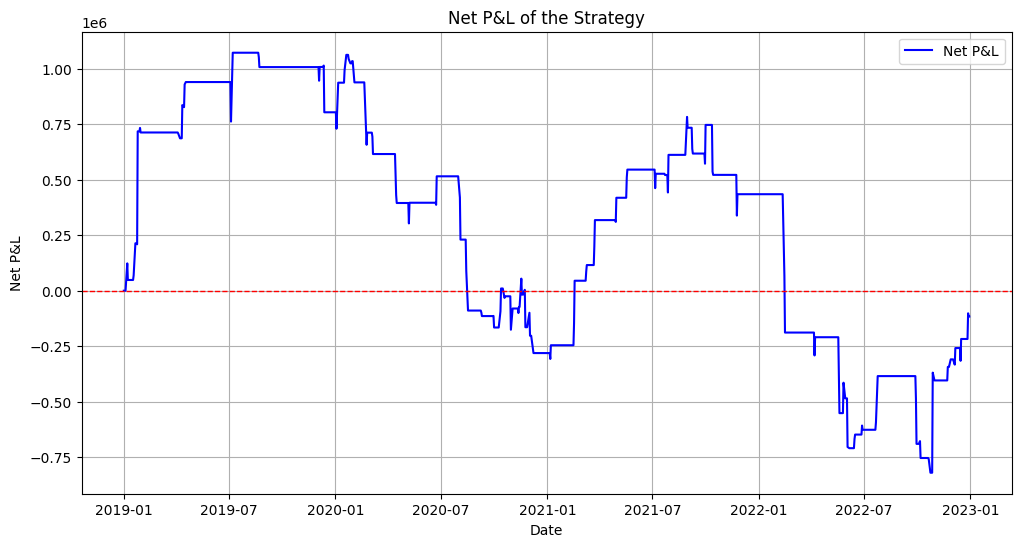

Risk-Reward Ratio: -0.06158661780835783
Expected Value (EV): -0.6388326057924268
successful trades: 646
total trades: 990
Probability of the strategy working: 0.6525252525252525


In [ ]:
#Taking maruti from automobile sector
if __name__ == '__main__':
    ticker = 'MARUTI.NS'
    start_date = '2019-01-01'
    end_date = '2022-12-31'
    data = yf.download(ticker, start=start_date, end=end_date)

    signals = bollinger_bands_strategy(data)
    portfolio = backtest_strategy(data, signals)
    # Print buy/sell signals
    print(signals.tail())

    # Calculate net P&L
    portfolio['Net P&L'] = portfolio['Total'] - portfolio['Total'][0]

    # Calculate risk-reward ratio
    total_return = portfolio['Net P&L'][-1]
    max_drawdown = (portfolio['Total'].cummax() - portfolio['Total']).max()
    risk_reward_ratio = total_return / max_drawdown

    # Calculate probability of the strategy working
    successful_trades = sum(portfolio['Net P&L'] > 0)
    total_trades = len(portfolio)
    probability = successful_trades / total_trades

    # Plot the net P&L graph
    plt.figure(figsize=(12, 6))
    plt.plot(portfolio.index, portfolio['Net P&L'], label='Net P&L', color='b')
    plt.axhline(0, color='r', linestyle='--', lw=1)  # Add a horizontal line at zero for reference
    plt.legend(loc='best')
    plt.xlabel('Date')
    plt.ylabel('Net P&L')
    plt.title('Net P&L of the Strategy')
    plt.grid(True)
    plt.show()

     # Print risk-reward ratio, expected value, and probability
    print("Risk-Reward Ratio:", risk_reward_ratio)
    print("Expected Value (EV):", portfolio['Returns'].mean() / portfolio['Returns'].std() * np.sqrt(252))
    print("successful trades:",successful_trades)
    print("total trades:",total_trades)
    print("Probability of the strategy working:", probability)

[*********************100%***********************]  1 of 1 completed
            signal   upper_band   lower_band  doji  positions
Date                                                         
2022-12-26     0.0  4519.863433  4304.166548   0.0        0.0
2022-12-27     0.0  4508.754712  4323.665259   0.0        0.0
2022-12-28     0.0  4507.611981  4327.173029   0.0        0.0
2022-12-29     0.0  4509.930040  4319.559950   0.0        0.0
2022-12-30     0.0  4514.532679  4302.412341   0.0        0.0


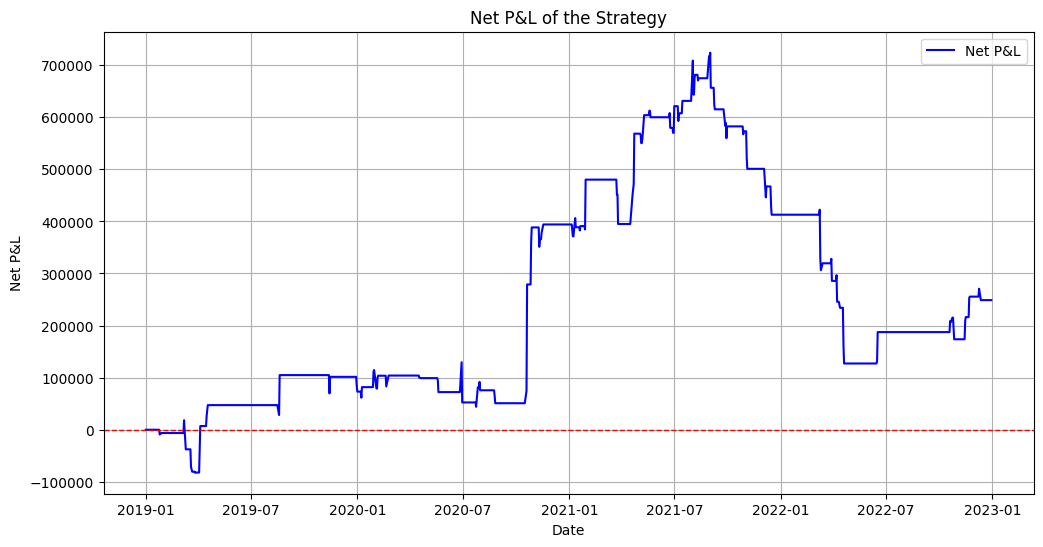

Risk-Reward Ratio: 0.4170471237607355
Expected Value (EV): 0.6623215890145242
successful trades: 927
total trades: 990
Probability of the strategy working: 0.9363636363636364


In [ ]:
#Taking britannia from FMCG
if __name__ == '__main__':
    ticker = 'BRITANNIA.NS'
    start_date = '2019-01-01'
    end_date = '2022-12-31'
    data = yf.download(ticker, start=start_date, end=end_date)

    signals = bollinger_bands_strategy(data)
    portfolio = backtest_strategy(data, signals)
    # Print buy/sell signals
    print(signals.tail())

    # Calculate net P&L
    portfolio['Net P&L'] = portfolio['Total'] - portfolio['Total'][0]

    # Calculate risk-reward ratio
    total_return = portfolio['Net P&L'][-1]
    max_drawdown = (portfolio['Total'].cummax() - portfolio['Total']).max()
    risk_reward_ratio = total_return / max_drawdown

    # Calculate probability of the strategy working
    successful_trades = sum(portfolio['Net P&L'] > 0)
    total_trades = len(portfolio)
    probability = successful_trades / total_trades

    # Plot the net P&L graph
    plt.figure(figsize=(12, 6))
    plt.plot(portfolio.index, portfolio['Net P&L'], label='Net P&L', color='b')
    plt.axhline(0, color='r', linestyle='--', lw=1)  # Add a horizontal line at zero for reference
    plt.legend(loc='best')
    plt.xlabel('Date')
    plt.ylabel('Net P&L')
    plt.title('Net P&L of the Strategy')
    plt.grid(True)
    plt.show()

     # Print risk-reward ratio, expected value, and probability
    print("Risk-Reward Ratio:", risk_reward_ratio)
    print("Expected Value (EV):", portfolio['Returns'].mean() / portfolio['Returns'].std() * np.sqrt(252))
    print("successful trades:",successful_trades)
    print("total trades:",total_trades)
    print("Probability of the strategy working:", probability)

[*********************100%***********************]  1 of 1 completed
            signal  upper_band  lower_band  doji  positions
Date                                                       
2022-12-26     0.0   79.466323   73.828677   0.0        0.0
2022-12-27     0.0   79.477788   73.797212   0.0        0.0
2022-12-28     1.0   79.501687   73.588313   1.0        1.0
2022-12-29     0.0   79.534057   73.410943   1.0        0.0
2022-12-30    -1.0   79.499070   73.395931   0.0       -1.0


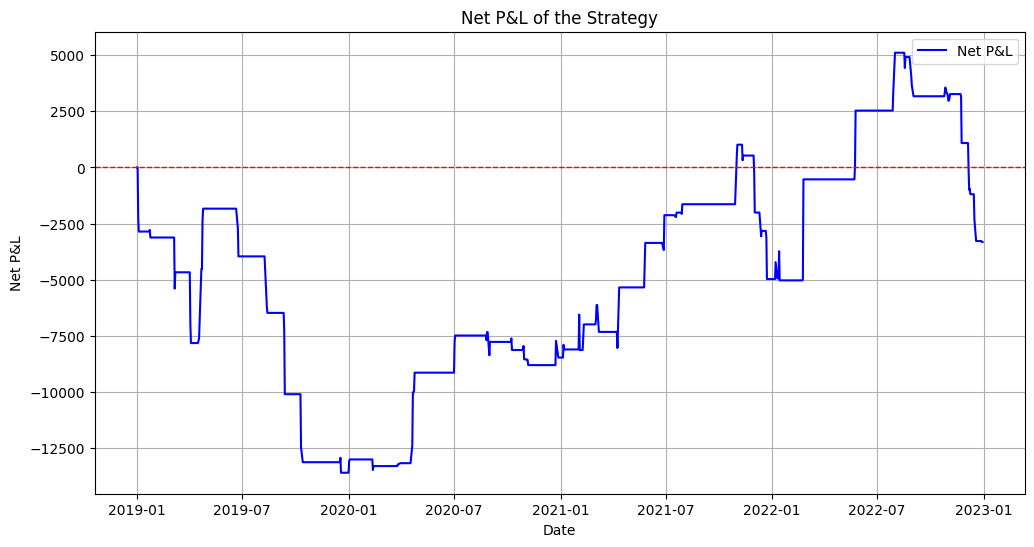

Risk-Reward Ratio: -0.24468040045073008
Expected Value (EV): -0.10180521545807818
successful trades: 154
total trades: 990
Probability of the strategy working: 0.15555555555555556


In [ ]:
#Taking Indian Oil Corporation from energy sector
if __name__ == '__main__':
    ticker = 'IOC.NS'
    start_date = '2019-01-01'
    end_date = '2022-12-31'
    data = yf.download(ticker, start=start_date, end=end_date)

    signals = bollinger_bands_strategy(data)
    portfolio = backtest_strategy(data, signals)
    # Print buy/sell signals
    print(signals.tail())

    # Calculate net P&L
    portfolio['Net P&L'] = portfolio['Total'] - portfolio['Total'][0]

    # Calculate risk-reward ratio
    total_return = portfolio['Net P&L'][-1]
    max_drawdown = (portfolio['Total'].cummax() - portfolio['Total']).max()
    risk_reward_ratio = total_return / max_drawdown

    # Calculate probability of the strategy working
    successful_trades = sum(portfolio['Net P&L'] > 0)
    total_trades = len(portfolio)
    probability = successful_trades / total_trades

    # Plot the net P&L graph
    plt.figure(figsize=(12, 6))
    plt.plot(portfolio.index, portfolio['Net P&L'], label='Net P&L', color='b')
    plt.axhline(0, color='r', linestyle='--', lw=1)  # Add a horizontal line at zero for reference
    plt.legend(loc='best')
    plt.xlabel('Date')
    plt.ylabel('Net P&L')
    plt.title('Net P&L of the Strategy')
    plt.grid(True)
    plt.show()

     # Print risk-reward ratio, expected value, and probability
    print("Risk-Reward Ratio:", risk_reward_ratio)
    print("Expected Value (EV):", portfolio['Returns'].mean() / portfolio['Returns'].std() * np.sqrt(252))
    print("successful trades:",successful_trades)
    print("total trades:",total_trades)
    print("Probability of the strategy working:", probability)

[*********************100%***********************]  1 of 1 completed
            signal  upper_band  lower_band  doji  positions
Date                                                       
2022-12-26     0.0  235.858372  218.516628   0.0        0.0
2022-12-27     0.0  235.958253  217.821747   0.0        0.0
2022-12-28     0.0  235.901610  217.473390   0.0        0.0
2022-12-29     0.0  235.949783  216.980216   0.0        0.0
2022-12-30     0.0  235.892946  216.882053   0.0        0.0


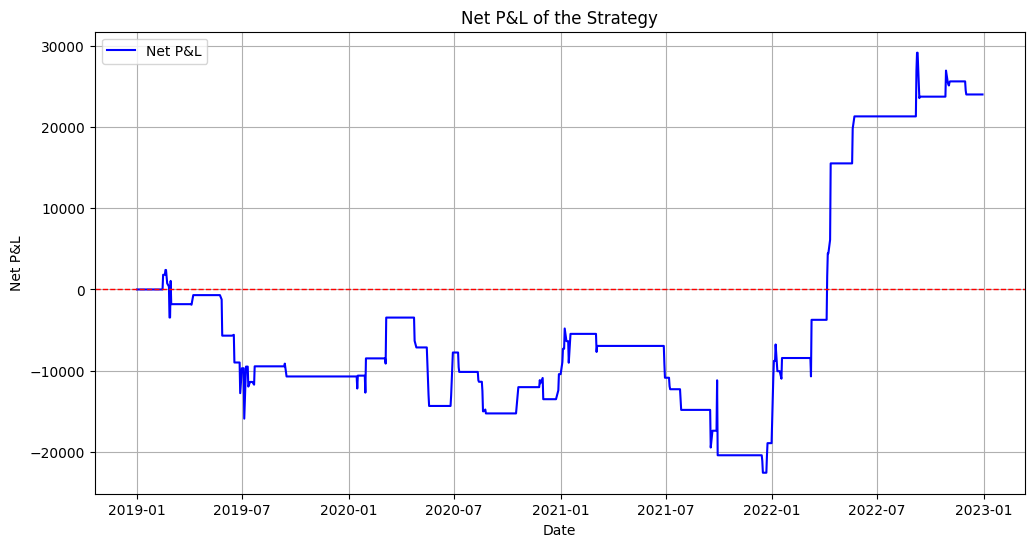

Risk-Reward Ratio: 0.9617752801091558
Expected Value (EV): 0.4096044397094937
successful trades: 192
total trades: 990
Probability of the strategy working: 0.19393939393939394


In [ ]:
#Taking coal india ltd from metal sector
if __name__ == '__main__':
    ticker = 'COALINDIA.NS'
    start_date = '2019-01-01'
    end_date = '2022-12-31'
    data = yf.download(ticker, start=start_date, end=end_date)

    signals = bollinger_bands_strategy(data)
    portfolio = backtest_strategy(data, signals)
    # Print buy/sell signals
    print(signals.tail())

    # Calculate net P&L
    portfolio['Net P&L'] = portfolio['Total'] - portfolio['Total'][0]

    # Calculate risk-reward ratio
    total_return = portfolio['Net P&L'][-1]
    max_drawdown = (portfolio['Total'].cummax() - portfolio['Total']).max()
    risk_reward_ratio = total_return / max_drawdown

    # Calculate probability of the strategy working
    successful_trades = sum(portfolio['Net P&L'] > 0)
    total_trades = len(portfolio)
    probability = successful_trades / total_trades

    # Plot the net P&L graph
    plt.figure(figsize=(12, 6))
    plt.plot(portfolio.index, portfolio['Net P&L'], label='Net P&L', color='b')
    plt.axhline(0, color='r', linestyle='--', lw=1)  # Add a horizontal line at zero for reference
    plt.legend(loc='best')
    plt.xlabel('Date')
    plt.ylabel('Net P&L')
    plt.title('Net P&L of the Strategy')
    plt.grid(True)
    plt.show()

     # Print risk-reward ratio, expected value, and probability
    print("Risk-Reward Ratio:", risk_reward_ratio)
    print("Expected Value (EV):", portfolio['Returns'].mean() / portfolio['Returns'].std() * np.sqrt(252))
    print("successful trades:",successful_trades)
    print("total trades:",total_trades)
    print("Probability of the strategy working:", probability)

In [ ]:
###PROS OF USING THE ABOVE STRATEGY
#1.Bollinger Bands adjust to marekt volatility
#2.Providing signals considering price fluctuation
#3.Widely used and apllicable to various time frames
#4.There is potetntial to high risk reward ration
#5.Bollinger band is versatile to other indicators also.
#6.Different type of doji give us diversity.
#7.Bollinger bands uses mean reversion which can be use to identify potential overbought or oversold conditions.

In [ ]:
####CONS OF USING ABOVE STRATEGY
#1.Bolinger band is a lagging inidcator;potentially leading to missed opportunities or delayed exits.
#2.strategy involves frequent trading, which can lead to higher transaction costs ,reducing overall returns.
#3.Overfitting the strategy to past market conditions, leading to poor performance in the future.
#4.Limited signal as strategy relies on doji
#5.Whipsaw Trading: When prices move within a narrow range, Bollinger Bands may generate multiple false signals
#6.Bollinger bands might give false signals during period of low volatility.